## Proyecto Visualización de datos, 2da entrega

El objetivo del ejercicio próximo es aplicar el desarrollo de visualizaciones de datos de al menos 3 tipos: Temporales, espaciales y multivariados.

**Integrantes**

+ Karen Rojas
+ Kelly Sarmiento
+ Daniel Acosta

In [138]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pn 
import altair as alt 

In [139]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
pd.options.mode.chained_assignment = None  #Desactivar warnings
sns.set(rc={'figure.figsize':(10.7,6.6)}) #Todas las visualizaciones con ese tamaño

## Base de datos a trabajar

El presente conjunto de datos contiene información del desempeño y comportamiento de las compañías aéreas que operan en Estados Unidos durante el mes de febrero del año de 2015.

Diccionario: https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ

In [140]:
Base_vuelos=pd.read_csv("On_Time_On_Time_Performance_2015_2.csv",sep=";",low_memory=False)
Base_vuelos.head(6)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0  2015        1      2           7          6  07/02/2015            AS   
1  2015        1      2           7          6  07/02/2015            AS   
2  2015        1      2           7          6  07/02/2015            AS   
3  2015        1      2           7          6  07/02/2015            AS   
4  2015        1      2           7          6  07/02/2015            AS   
5  2015        1      2           7          6  07/02/2015            AS   

   AirlineID Carrier TailNum  FlightNum  OriginAirportID  OriginAirportSeqID  \
0      19930      AS  N618AS        131            14057             1405702   
1      19930      AS  N778AS        132            11630             1163002   
2      19930      AS  N586AS        140            10299             1029904   
3      19930      AS  N615AS        143            14057             1405702   
4      19930      AS  N471AS        149            12892             1289203   
5      19930      AS  N535AS        150            10299             1029904   

   OriginCityMarketID Origin   OriginCityName OriginState  OriginStateFips  \
0               34057    PDX     Portland, OR          OR               41   
1               31517    FAI    Fairbanks, AK          AK                2   
2               30299    ANC    Anchorage, AK          AK                2   
3               34057    PDX     Portland, OR          OR               41   
4               32575    LAX  Los Angeles, CA          CA                6   
5               30299    ANC    Anchorage, AK          AK                2   

  OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  \
0          Oregon         92          10299           1029904   
1          Alaska          1          14747           1474703   
2          Alaska          1          14057           1405702   
3          Oregon         92          10299           1029904   
4      California         91          10299           1029904   
5          Alaska          1          12892           1289203   

   DestCityMarketID Dest     DestCityName DestState  DestStateFips  \
0             30299  ANC    Anchorage, AK        AK              2   
1             30559  SEA      Seattle, WA        WA             53   
2             34057  PDX     Portland, OR        OR             41   
3             30299  ANC    Anchorage, AK        AK              2   
4             30299  ANC    Anchorage, AK        AK              2   
5             32575  LAX  Los Angeles, CA        CA              6   

  DestStateName  DestWac  CRSDepTime  DepTime  DepDelay  DepDelayMinutes  \
0        Alaska        1         940    959.0      19.0             19.0   
1    Washington       93        1730   1717.0     -13.0              0.0   
2        Oregon       92        1140   1132.0      -8.0              0.0   
3        Alaska        1        2210   2201.0      -9.0              0.0   
4        Alaska        1        1940   1941.0       1.0              1.0   
5    California       91        2340   2331.0      -9.0              0.0   

   DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  \
0       1.0                   1.0  0900-0959     10.0     1009.0    1224.0   
1       0.0                  -1.0  1700-1759      9.0     1726.0    2143.0   
2       0.0                  -1.0  1100-1159     13.0     1145.0    1557.0   
3       0.0                  -1.0  2200-2259     10.0     2211.0      24.0   
4       0.0                   0.0  1900-1959     13.0     1954.0    2343.0   
5       0.0                  -1.0  2300-2359     16.0     2347.0     541.0   

   TaxiIn  CRSArrTime  ArrTime  ArrDelay  ArrDelayMinutes  ArrDel15  \
0     3.0        1239   1227.0     -12.0              0.0       0.0   
1     6.0        2205   2149.0     -16.0              0.0       0.0   
2     3.0        1608   1600.0      -8.0              0.0       0.0   
3     4.0         103     28.0     -35.0           

In [141]:
print("Cantidad de observaciones", Base_vuelos.shape[0])
print("Cantidad de variables", Base_vuelos.shape[1])

Cantidad de observaciones 429191
Cantidad de variables 109


## Pre-procesamiento de la base

### Selección de variables y observaciones a trabajar


+ DayofMonth: Día del mes
+ FlightDate: Fecha de vuelo
+ OriginCityName: Nombre de ciudad de origen
+ OriginStateName: Nombre de Estado Origen
+ DestCityName: Nombre de Ciudad Destino
+ DestStateName: Nombre de Estado Destino
+ DepDelayMinutes: Diferencia en minutos entre la hora de salida programada y la real. Salidas anticipadas configuradas en 0.
+ DepDel15: Indicador de retraso de salida, 15 minutos o más (1 = Sí)
+ ArrDelayMinutes: Diferencia en minutos entre la hora de llegada programada y la real. Llegadas anticipadas configuradas en 0.
+ ArrDel15: Indicador de retraso de llegada, 15 minutos o más (1 = Sí)
+ Cancelled: Indicador de vuelo cancelado (1 = Sí) 
+ Diverted: Indicador de vuelo desviado (1 = Sí)
+ AirTime: Tiempo de vuelo, en minutos
+ Flights: Numero de vuelos
+ Distance: Distancia entre aeropuertos (millas)
+ CarrierDelay: Retraso del operador, en minutos
+ WeatherDelay: Retraso meteorológico, en minutos
+ NASDelay: Retraso del sistema aéreo nacional, en minutos
+ SecurityDelay: Retraso de seguridad, en minutos
+ LateAircraftDelay: Retraso tardío de la aeronave, en minutos
+ ArrTime: Hora de llegada real (hora local: hhmm)

In [190]:
Base_vuelos2=Base_vuelos[["DayofMonth","FlightDate","OriginCityName","OriginStateName","DestCityName","DestStateName","DepDelayMinutes","DepDel15","ArrDelayMinutes","ArrDel15","Cancelled","Diverted","AirTime","Flights","Distance","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","ArrTime"]]

In [191]:
print("Cantidad de observaciones", Base_vuelos2.shape[0])
print("Cantidad de variables", Base_vuelos2.shape[1])

Cantidad de observaciones 429191
Cantidad de variables 21


In [192]:
Base_vuelos2.dtypes

DayofMonth             int64
FlightDate            object
OriginCityName        object
OriginStateName       object
DestCityName          object
DestStateName         object
DepDelayMinutes      float64
DepDel15             float64
ArrDelayMinutes      float64
ArrDel15             float64
Cancelled              int64
Diverted               int64
AirTime              float64
Flights                int64
Distance               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
ArrTime              float64
dtype: object

In [193]:
Base_vuelos2.head(6)

DayofMonth  FlightDate   OriginCityName OriginStateName     DestCityName  \
0           7  07/02/2015     Portland, OR          Oregon    Anchorage, AK   
1           7  07/02/2015    Fairbanks, AK          Alaska      Seattle, WA   
2           7  07/02/2015    Anchorage, AK          Alaska     Portland, OR   
3           7  07/02/2015     Portland, OR          Oregon    Anchorage, AK   
4           7  07/02/2015  Los Angeles, CA      California    Anchorage, AK   
5           7  07/02/2015    Anchorage, AK          Alaska  Los Angeles, CA   

  DestStateName  DepDelayMinutes  DepDel15  ArrDelayMinutes  ArrDel15  \
0        Alaska             19.0       1.0              0.0       0.0   
1    Washington              0.0       0.0              0.0       0.0   
2        Oregon              0.0       0.0              0.0       0.0   
3        Alaska              0.0       0.0              0.0       0.0   
4        Alaska              1.0       0.0              0.0       0.0   
5    California              0.0       0.0              0.0       0.0   

   Cancelled  Diverted  AirTime  Flights  Distance  CarrierDelay  \
0          0         0    195.0        1      1542           NaN   
1          0         0    197.0        1      1533           NaN   
2          0         0    192.0        1      1542           NaN   
3          0         0    193.0        1      1542           NaN   
4          0         0    289.0        1      2345           NaN   
5          0         0    294.0        1      2345           NaN   

   WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  ArrTime  
0           NaN       NaN            NaN                NaN   1227.0  
1           NaN       NaN            NaN                NaN   2149.0  
2           NaN       NaN            NaN                NaN   1600.0  
3           NaN       NaN            NaN                NaN     28.0  
4           NaN       NaN            NaN                NaN   2349.0  
5           NaN       NaN            NaN                NaN    547.0

### Vuelos cancelados y desviados

No se tendrá en cuenta los vuelos cancelados ni desviados, ya que estas observaciones generan faltantes en las demás variables y no interesan para el estudio en concreto

In [194]:
pd.DataFrame(Base_vuelos2["Cancelled"].value_counts(normalize=True)*100)

Cancelled
0  95.219611
1   4.780389

In [195]:
pd.DataFrame(Base_vuelos2["Diverted"].value_counts(normalize=True)*100)

Diverted
0  99.764441
1   0.235559

Tan solo el 4,7% aproximadamente de los vuelos fueron cancelados y el 0.2% desviados

In [196]:
Base_Alter=Base_vuelos2[(Base_vuelos2["Cancelled"]==0) & (Base_vuelos2["Diverted"]==0)]

In [197]:
print("Cantidad de observaciones", Base_Alter.shape[0])
print("Cantidad de variables", Base_Alter.shape[1])

Cantidad de observaciones 407663
Cantidad de variables 21


### Valores faltantes

In [198]:
Nulos=pd.DataFrame(Base_Alter.isnull().sum(),columns=["Cantidad Nulos"])

In [199]:
Nulos["Porcentaje"]=round(Nulos["Cantidad Nulos"]/Base_Alter.shape[0],2)*100

In [200]:
Nulos.sort_values(["Cantidad Nulos"],ascending=False)

Cantidad Nulos  Porcentaje
LateAircraftDelay          312484        77.0
SecurityDelay              312484        77.0
NASDelay                   312484        77.0
WeatherDelay               312484        77.0
CarrierDelay               312484        77.0
DayofMonth                      0         0.0
Diverted                        0         0.0
Distance                        0         0.0
Flights                         0         0.0
AirTime                         0         0.0
Cancelled                       0         0.0
FlightDate                      0         0.0
ArrDel15                        0         0.0
ArrDelayMinutes                 0         0.0
DepDel15                        0         0.0
DepDelayMinutes                 0         0.0
DestStateName                   0         0.0
DestCityName                    0         0.0
OriginStateName                 0         0.0
OriginCityName                  0         0.0
ArrTime                         0         0.0

Se haya la misma cantidad de faltantes(312,484) en las 5 variables que representa las causas de retraso en la llegada de los vuelos, se procede a mirar la razón de esto

In [201]:
print("1 si el vuelo tardó en llegar más de 15 minutos, 0 si tardó menos")
pd.DataFrame(Base_Alter["ArrDel15"].value_counts())

1 si el vuelo tardó en llegar más de 15 minutos, 0 si tardó menos


ArrDel15
0.0    312484
1.0     95179

Se observa que los faltantes en las diferente causas de retraso concuerdan con los vuelos que se retrasaron en su llegada por menos de 15 minutos, es decir si el vuelo llegó a la ciudad de destino con más de 15 minutos de retraso se justifica su causa de lo contrario no. Por este motivo se reemplazará los NaN's de estas variables con ceros.

In [202]:
var=["LateAircraftDelay","SecurityDelay","NASDelay","WeatherDelay","CarrierDelay"]

for col in var:
    Base_Alter[col].fillna(0,inplace=True)

# Exploración de base

### Top 10 ciudades elegidas como destino

In [322]:
print("Cantidad de ciudades destino: ",len(Base_Alter["DestCityName"].value_counts()))

Cantidad de ciudades destino:  311


In [323]:
Top=pd.DataFrame(Base_Alter.groupby("DestCityName",as_index=False)["Flights"].sum())
Top["Porcentaje"]=round(Top["Flights"]/Base_Alter.shape[0],4)*100
Top["Porcentaje"].sum()

100.01

In [325]:
Top10=Top.sort_values(by="Flights",ascending=False).head(10)
Top10.columns=["Ciudad_destino","Cantidad_vuelos","Porcentaje"]
Top10.head()

Ciudad_destino  Cantidad_vuelos  Porcentaje
17             Atlanta, GA            26343        6.46
58             Chicago, IL            25615        6.28
74   Dallas/Fort Worth, TX            18737        4.60
133            Houston, TX            16011        3.93
175        Los Angeles, CA            15375        3.77

In [326]:
print(round(Top10["Porcentaje"].sum(),4), "%")

40.61 %


Las 10 ciudades top elegidas como destino representa el 40.61% de las observaciones

Text(0.5,0,'Cantidad vuelos')

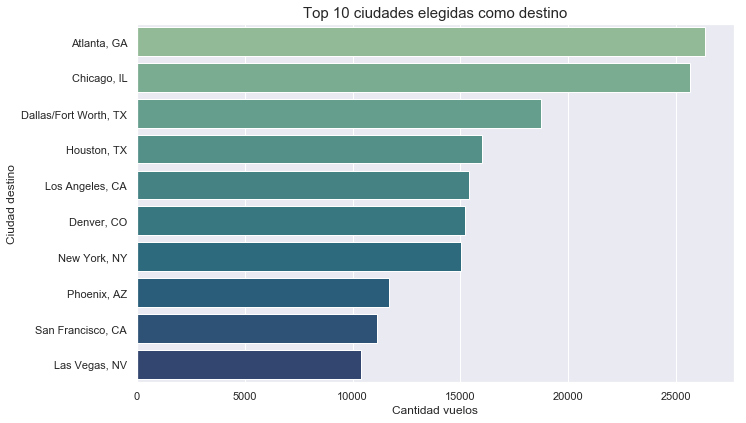

In [327]:
sns.barplot(x="Cantidad_vuelos",y="Ciudad_destino",data=Top10,palette="crest",ci=None)
plt.title("Top 10 ciudades elegidas como destino",size=15)
plt.ylabel("Ciudad destino")
plt.xlabel("Cantidad vuelos")

In [ ]:
### Cantidad de vuelos por "Hora de llegada"

In [328]:
Base_Alter["ArrTime"].describe() #Formato hhmm, 1 = 0001, 600= 0600

count    407663.000000
mean       1496.470403
std         505.242044
min           1.000000
25%        1119.000000
50%        1524.000000
75%        1918.000000
max        2400.000000
Name: ArrTime, dtype: float64

In [329]:
def catego(hora):
    if (hora>=600) & (hora<=1200):
        return 'Mañana'
    if (hora>1200) & (hora<=1800):
        return 'Tarde'
    if (hora>1800) & (hora<=2400):
        return 'Noche'
    if (hora>0) & (hora<600):
        return 'Amanecer'

In [330]:
Base_Alter["Categoria_Hora"]= Base_Alter["ArrTime"].map(catego)

In [331]:
Cate= pd.DataFrame(Base_Alter["Categoria_Hora"].value_counts())
Cate["Hora del día"]=Cate.index
Cate.columns=["Cantidad_vuelos","Hora del día"]
Cate

Cantidad_vuelos Hora del día
Tarde              153196        Tarde
Noche              136071        Noche
Mañana             107487       Mañana
Amanecer            10909     Amanecer

Text(0.5,1,'Vuelos por hora del día')

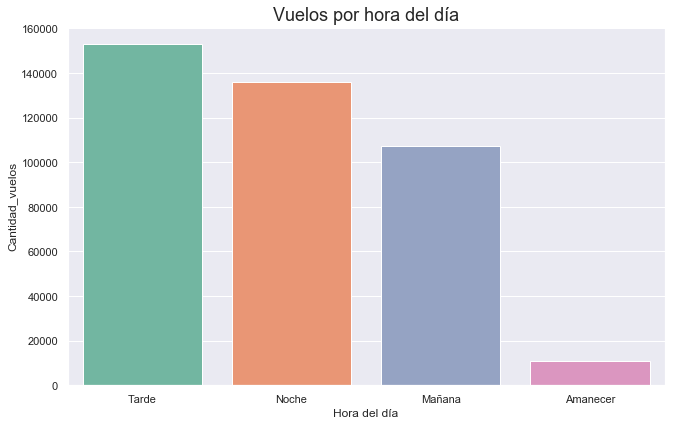

In [332]:
sns.barplot(x="Hora del día",y="Cantidad_vuelos",data=Cate,palette="Set2",ci=None)
plt.title("Vuelos por hora del día",size=18)

### Retraso de llegada del vuelo según causa

In [333]:
Base_causa=Base_Alter[["DestCityName","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].melt(id_vars=["DestCityName"],var_name="Causa")
Base_causa.columns=["Ciudad_Destino","Causa","Retraso"]
Base_causa.head(3)

Ciudad_Destino         Causa  Retraso
0  Anchorage, AK  CarrierDelay      0.0
1    Seattle, WA  CarrierDelay      0.0
2   Portland, OR  CarrierDelay      0.0

In [334]:
print(Base_causa["Retraso"].sum(), "igual a ", Base_Alter.loc[Base_Alter["ArrDel15"]==1, "ArrDelayMinutes"].sum())

5635596.0 igual a  5635596.0


In [335]:
Causa=Base_causa.groupby('Causa',as_index=False)['Retraso'].sum().sort_values("Retraso",ascending=False)
Causa.columns=["Causa","Retraso"]
Causa

Causa    Retraso
1  LateAircraftDelay  2157918.0
0       CarrierDelay  1712660.0
2           NASDelay  1349173.0
4       WeatherDelay   411265.0
3      SecurityDelay     4580.0

Text(0.5,0,'Causa de retraso')

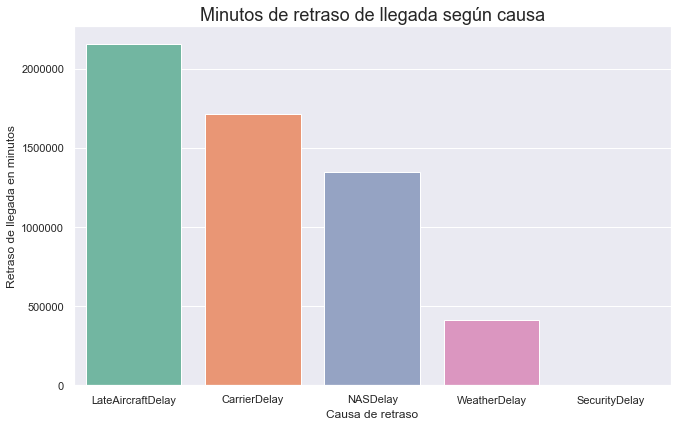

In [336]:
sns.barplot(x="Causa",y="Retraso",data=Causa,palette="Set2",ci=None)
plt.title("Minutos de retraso de llegada según causa",size=18)
plt.ylabel("Retraso de llegada en minutos")
plt.xlabel("Causa de retraso")

# Visualizaciones temporales

In [182]:
Base_Alter["ArrTime"]=Base_Alter["ArrTime"].astype("int").astype("string")

In [183]:
Base_Alter.loc[Base_Alter["ArrTime"].str.len()==3,"ArrTime"]='0'+ Base_Alter["ArrTime"]
Base_Alter.loc[Base_Alter["ArrTime"].str.len()==2,"ArrTime"]= '00' + Base_Alter["ArrTime"]
Base_Alter.loc[Base_Alter["ArrTime"].str.len()==1,"ArrTime"]='000' + Base_Alter["ArrTime"]
Base_Alter.loc[Base_Alter["ArrTime"]=='2400'] = '2359'

In [184]:
Base_Alter["ArrTime"]=pd.to_datetime(Base_Alter["ArrTime"],format='%H%M')

### Retraso en llegada del vuelo y sus causas a lo largo del día
*Presentado por Karen Rojas*

In [186]:
Base_Hora_Retraso=Base_Alter[["ArrTime","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].melt(id_vars=["ArrTime"],var_name="Causa")
Base_Hora_Retraso.columns=["Hora_llegada","Causa_retraso","Retraso_minutos"]

In [187]:
Base_Hora_Retraso.loc[Base_Hora_Retraso["Causa_retraso"]=="CarrierDelay","Causa_retraso"]="Operador"
Base_Hora_Retraso.loc[Base_Hora_Retraso["Causa_retraso"]=="WeatherDelay","Causa_retraso"]="Clima"
Base_Hora_Retraso.loc[Base_Hora_Retraso["Causa_retraso"]=="NASDelay","Causa_retraso"]="Sitema Aéreo Nacional"
Base_Hora_Retraso.loc[Base_Hora_Retraso["Causa_retraso"]=="SecurityDelay","Causa_retraso"]="Seguridad"
Base_Hora_Retraso.loc[Base_Hora_Retraso["Causa_retraso"]=="LateAircraftDelay","Causa_retraso"]="Aeronave"

In [188]:
Base_Hora_Retraso.head(7)

Hora_llegada Causa_retraso Retraso_minutos
0 1900-01-01 12:27:00      Operador             0.0
1 1900-01-01 21:49:00      Operador             0.0
2 1900-01-01 16:00:00      Operador             0.0
3 1900-01-01 00:28:00      Operador             0.0
4 1900-01-01 23:49:00      Operador             0.0
5 1900-01-01 05:47:00      Operador             0.0
6 1900-01-01 12:19:00      Operador             0.0

In [112]:
Base_Hora_Retraso.dtypes

Hora_llegada       datetime64[ns]
Causa_retraso              object
Retraso_minutos            object
dtype: object

In [ ]:
alt.data_transformers.disable_max_rows()
alt.Chart(Base_Hora_Retraso).mark_area().encode(
    alt.X('Hora_llegada:T',
          axis=alt.Axis(format='%H%M')
    ),
    alt.Y('mean(Retraso_minutos):Q', stack='normalize', axis=None),
    alt.Color('Causa_retraso:N',
        scale=alt.Scale(scheme='pastel2')
    )
).properties(
    width=800,
    height=600, title="Retraso en la llegada del vuelo y sus causas a lo largo el día"
)

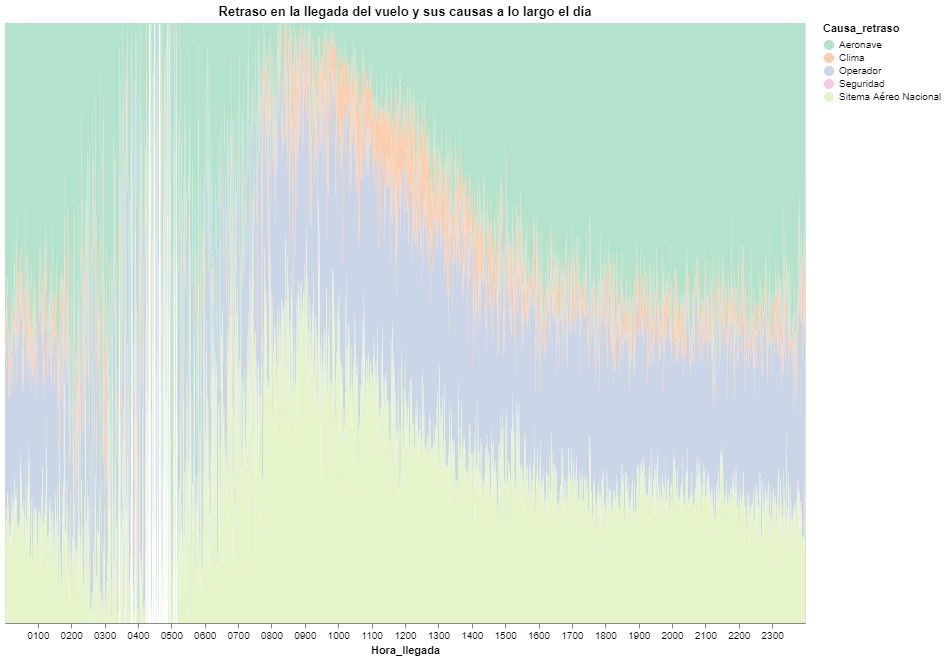

### Observaciones

Se puede observar como a través de las horas del día el retraso por causa de la aeronave destaca entre las demás, presentándose una excepción en las horas de la mañana (8 am- 12 pm), momento en el que hay mayor retraso por causa del operador y el sistema aéreo nacional. Adicionalmente, el retraso de llegada por causa de clima no es muy común y por causa de seguridad es casi nulo ya que no se puede ni visualizar en él gráfico. También entre las 4 am y 5 am no se presenta retraso también debido a que en estas horas hay pocos vuelos.

### Abstracción del ¿qué?, ¿por qué? y ¿cómo?

**What?** Para la realización del gráfico se hace uso de una tabla temporal con atributos de diferentes tipos: Se encuentra la variable "Causa Retraso" que, como su nombre lo indica" representa la causa del retraso de llegada del vuelo y es de tipo categórica; la variable "Retraso_minuto" es de tipo cuantitativo ordenado con dirección secuencial que contiene el retraso de llegada del vuelo en minutos y finalmente el atributo "Hora llegada" que es de tipo temporal, más precisamente de tipo ordenado ordinal y representa la hora de llegada del vuelo las 24 horas del día.
    
**Why?** Buscar, identificar y comparar las tendencias de cada uno de los subgrupos en los que se divide la visualización, en este caso diferencias entre las causas de retraso del vuelo a lo largo del día.
    
**How?** Inicialmente, se vio la necesidad de convertir la variable "Hora de llegada" del vuelo a formato fecha, "hhmm". Para este fin se pasó primero a tipo string con el fin de limpiarla, esto debido a que, aunque la variable estuviera en formato "hhmm", no tomaba los ceros de la izquierda, y para solucionarlo se decidió medir la longitud de cada valor de hora y de acuerdo al resultado se añadió los ceros a la izquierda necesarios para completar la longitud y lograr convertir la variable a formato temporal, "hhmm". Finalmente se prosiguió a separar los atributos a usar en la visualización (hora de llegada, causa de retraso y retraso en minutos) y se llevó las variables de causa de retraso a formato largo. Y con esta tabla se realizó el gráfico.

### Marcas y canales

+ La marca usada es de área, como una ordenación de capas, donde la altura codifica el promedio del retraso en minutos por causa de este.

Y con respecto a los canales usados, se tiene:

+ Canal de posición horizontal representado por la hora de llegada del vuelo en formato "hhmm".
+ Canal de posición vertical dado por el promedio de tiempo de retraso en minutos.
+ Canal de color que representa las diferentes causas del retraso.

### Mejoras posibles

Se podría proponer el uso de la propiedad de interactividad en el gráfico, permitiendo que, al pararse con el cursor en alguna parte del gráfico, se mostrara la hora de llegada asociada y adicionalmente el tiempo de retraso en minutos que se presentó en ese momento del día y su causa, esto permitiría mostrar a más detalle la información. Con respecto a marca, se podría probar implementado también un streamgraph pero en vez de normalizado, centrado y mirar cuál es más intuitivo de entender.


### Cantidad de vuelos totales durante las horas del día
*Presentado por Kelly Sarmiento*

In [256]:
tab=pd.pivot_table(Base_Alter,values="Flights",index=["ArrTime"],aggfunc=np.sum,fill_value=0).reset_index()
tab.columns=["Hora_llegada","Total_vuelos"]

Hora_llegada  Total_vuelos
0           1.0           170
1           2.0           172
2           3.0           142
3           4.0           148
4           5.0           154
5           6.0           138
6           7.0           133

C:\Users\Personal\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Personal\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Personal\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


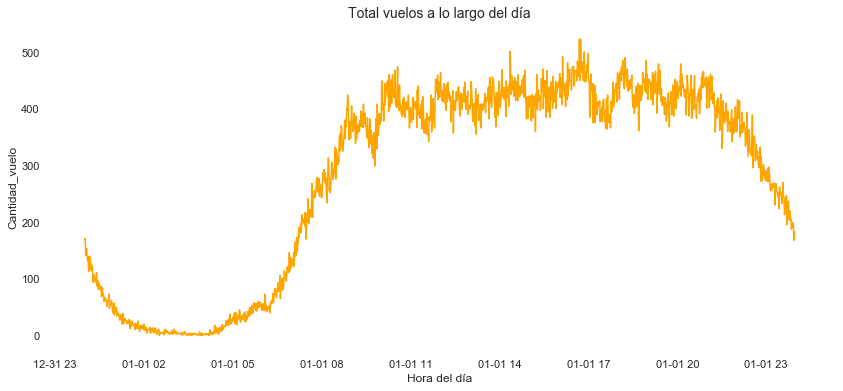

In [122]:
plt.figure(figsize=(14,6))
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(tab["Hora_llegada"],tab["Total_vuelos"],color="orange")
plt.title("Total vuelos a lo largo del día",size=14)
plt.xlabel("Hora del día")
plt.ylabel("Cantidad_vuelo")
plt.grid(False)
plt.show()

**OBSERVACIONES:**

En esta visualización vemos la cantidad de vuelos totales a lo largo del día y como observamos en la hora de la madrugada desde las 00 hasta la 06Am no hay muchos vuelos y desde esa hora empiezan a subir la cantidad de vuelos.


**¿QUÉ?**

Se utilizo una tabla temporal con atributos de tipo Ordenado Secuencial con la variable CANTIDAD DE VUELO y de tipo Temporal Ordenado Ordinal con la variable HORA DEL DÍA.


**¿POR QUÉ?**

Compara tendencias, similitudes y valores atipicos en este caso de cantidad de vuelos en la hora del día.

**¿CÓMO?**



**MARCAS Y CANALES**

- Se uso la marca de lineas para la variable cuantitativa

- Y se uso los canales de Posición Vertical dado por la CANTIDA DE VUELOS y la Posición Horizontal dado la HORA DEL DÍA

**MEJORAS POSIBLES**

Una de las mejoras

### Dias del mes que presentaron mayores retrasos
*Presentado por: Daniel Arturo Acosta Gaitan*

In [207]:
Base_Alter["FlightDate"]=pd.to_datetime(Base_Alter["FlightDate"],format='%d/%m/%Y')

In [208]:
Base_Dia_Retraso=Base_Alter[["FlightDate","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].melt(id_vars=["FlightDate"],var_name="Causa")
Base_Dia_Retraso.columns=["FlightDate","Causa_retraso","Retraso_minutos"]
Base_Dia_Retraso.head()

FlightDate Causa_retraso  Retraso_minutos
0 2015-02-07  CarrierDelay              0.0
1 2015-02-07  CarrierDelay              0.0
2 2015-02-07  CarrierDelay              0.0
3 2015-02-07  CarrierDelay              0.0
4 2015-02-07  CarrierDelay              0.0

In [209]:
Base_Dia_Retraso['FlightDate']=pd.to_datetime(Base_Dia_Retraso['FlightDate'])
Base_Dia_Retraso.sort_values(by=['FlightDate'], inplace=True, ascending=True)
Base_Dia_Retraso.head()
#febrero=pd.DataFrame(Base_Alter["FlightDate"].value_counts(normalize=False)).head(28)
#febrero
#febrero=pd.DataFrame(Base_Alter["FlightDate"].value_counts(normalize=True)).sort_values(by='Date',ascending=False).head(28)
#febrero

FlightDate Causa_retraso  Retraso_minutos
475611 2015-02-01  WeatherDelay              0.0
326003 2015-02-01  CarrierDelay             49.0
978750 2015-02-01      NASDelay              0.0
978749 2015-02-01      NASDelay              0.0
978748 2015-02-01      NASDelay              0.0

In [210]:
febrero=pd.pivot_table(Base_Dia_Retraso,values="Retraso_minutos",index=["FlightDate"],aggfunc=np.sum,fill_value=0).reset_index()
febrero.columns=["FlightDate","Retrasos_acumulados"]
febrero.dtypes

FlightDate             datetime64[ns]
Retrasos_acumulados             int64
dtype: object

In [215]:
import calplot
import calmap
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd
all_days = pd.date_range('02/01/2015', periods=28, freq='D')
events = pd.Series(febrero["Retrasos_acumulados"].values,index=all_days)

C:\Users\Personal\AppData\Roaming\Python\Python37\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


(<Figure size 900x122.4 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF1502AB88>],
       dtype=object))

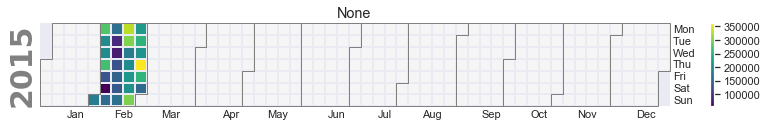

In [216]:
calplot.calplot(events)

### Abstracción del ¿qué?, ¿por qué? y ¿cómo?

**What?**
Esta visualizacion esta basada en la información que resume por fecha la cantidad de minutos retrasados de vuelos en Estados Unidos, en el mes de febrero de 2015. Esto se hace mediante un dataset tipo tabla que contiene dos variables, una tipo cuantitativa numerica que muestra el acumulado de retrasos, y una variable temporal para indicar la fecha.

**Why?**
Entre las acciones que permite realizar esta visualización se encuentra la de presentar, tambien realizar un lookup para identificar posibles valores atipicos. 

**How?**
La principal tarea que cumple esta visualización es la de ordenar cronologicamente, para lo cual se necesitó encontrar el acumulado por dia de minutos de retraso registrados en los vuelos que tuvieron esta situación. Esto se realizo mediante la ayuda de filtros e indexaciones requeridas por la funcipon calplot.
    
### Marcas y canales
     
+ La visualización hace uso del canal de posición para realizar el ordenamiento de la variable cuantitativa. Para este caso enmarcado bajo la forma de calendario.
+ Se utiliza el canal de color para denotar el valor de la variable cuantitativa.

+ Las marcas de lineas y areas se utilizan aqui para separar y diferenciar los valores que toma la variable cuantitativa.
     
     
### Mejoras posibles

+ Tras haber revisado la documentación de la libreria calplot no fue posible realizar una visualización que permitiera la vista unica de un mes en particular, lo cual resulta en un desperdicio de espacio que puede ser valioso para resaltar más atributos del mismo.
+ Personalmente invertiria la paleta de colores para denotar los dias con mayores retrasos con colores oscuros y dejar los colores claros para aquellos donde se presentaron menos.

# Visualizaciones multivariadas

### Cantidad de vuelos de origen a destino en ciudades top 12

*Presentado por Karen Rojas*

In [217]:
import networkx as nx
from pyvis.network import Network

In [218]:
print("Cantidad de Ciudades Origen:", Base_Alter["OriginCityName"].value_counts().shape[0])
print("Cantidad de Ciudades Destino:", Base_Alter["DestCityName"].value_counts().shape[0])
print("Cantidad de Estados Origen:", Base_Alter["OriginStateName"].value_counts().shape[0])
print("Cantidad de Estados Destino:", Base_Alter["DestStateName"].value_counts().shape[0])

Cantidad de Ciudades Origen: 311
Cantidad de Ciudades Destino: 311
Cantidad de Estados Origen: 53
Cantidad de Estados Destino: 53


In [219]:
Top10_ciudad_destino=Base_Alter["DestCityName"].value_counts().sort_values(ascending=False).reset_index().head(10)
Top10_ciudad_destino.columns=["Ciudad_destino","Cantidad_vuelos"]

In [220]:
Base_top_ciudad_destino=Base_Alter.loc[Base_Alter["DestCityName"].isin(Top10_ciudad_destino["Ciudad_destino"]),]
Base_top_ciudad_destino.shape

(165537, 21)

In [221]:
Base_top_ciudad_destino.shape[0]/(Base_Alter.shape[0])

0.4060633415345518

In [222]:
pd.crosstab(Base_top_ciudad_destino["OriginCityName"],Base_top_ciudad_destino["DestCityName"],
            margins=True,margins_name="Total").sort_values(by="Total",ascending=False).head(10)

DestCityName           Atlanta, GA  Chicago, IL  Dallas/Fort Worth, TX  \
OriginCityName                                                           
Total                        26343        25615                  18737   
Los Angeles, CA                339          690                    530   
Chicago, IL                    800            0                    548   
New York, NY                   739          958                    360   
San Francisco, CA              228          485                    364   
Atlanta, GA                      0          792                    582   
Las Vegas, NV                  273          493                    366   
Denver, CO                     357          622                    442   
Washington, DC                 719          804                    303   
Dallas/Fort Worth, TX          579          559                      0   

DestCityName           Denver, CO  Houston, TX  Las Vegas, NV  \
OriginCityName                                                  
Total                       15189        16011          10396   
Los Angeles, CA               427          402            846   
Chicago, IL                   633          440            502   
New York, NY                  278          278            281   
San Francisco, CA             363          257            637   
Atlanta, GA                   357          648            273   
Las Vegas, NV                 490          342              0   
Denver, CO                      0          564            489   
Washington, DC                354          370            133   
Dallas/Fort Worth, TX         441          449            369   

DestCityName           Los Angeles, CA  New York, NY  Phoenix, AZ  \
OriginCityName                                                      
Total                            15375         15032        11690   
Los Angeles, CA                      0           994          614   
Chicago, IL                        654           953          539   
New York, NY                       995             0          157   
San Francisco, CA                 1006           665          374   
Atlanta, GA                        339           740          296   
Las Vegas, NV                      877           278          463   
Denver, CO                         400           280          600   
Washington, DC                     333           605          106   
Dallas/Fort Worth, TX              526           358          327   

DestCityName           San Francisco, CA   Total  
OriginCityName                                    
Total                              11149  165537  
Los Angeles, CA                      980    5822  
Chicago, IL                          488    5557  
New York, NY                         668    4714  
San Francisco, CA                      0    4379  
Atlanta, GA                          228    4255  
Las Vegas, NV                        615    4197  
Denver, CO                           386    4140  
Washington, DC                       296    4023  
Dallas/Fort Worth, TX                363    3971

In [223]:
Top_ciudad_origen=Base_top_ciudad_destino["OriginCityName"].value_counts().sort_values(ascending=False).reset_index().head(12)
Base_top_origen_destino=Base_top_ciudad_destino.loc[Base_top_ciudad_destino["OriginCityName"].isin(Top_ciudad_origen["index"]),]

In [224]:
Base_top_origen_destino.shape

(51803, 21)

In [314]:
Base_nodo=Base_top_origen_destino.groupby(['OriginCityName','DestCityName'],as_index=False)["Flights"].sum()
Base_nodo.sort_values(by="Flights",ascending=False).head(6)

OriginCityName       DestCityName  Flights
87  San Francisco, CA    Los Angeles, CA     1006
69       New York, NY    Los Angeles, CA      995
60    Los Angeles, CA       New York, NY      994
62    Los Angeles, CA  San Francisco, CA      980
64       New York, NY        Chicago, IL      958
15        Chicago, IL       New York, NY      953

In [315]:
nodo_distance=Base_top_origen_destino.groupby(['OriginCityName','DestCityName'],as_index=False)["Distance"].mean()
nodo_distance.sort_values(by="Distance",ascending=False).head(6)

OriginCityName       DestCityName     Distance
88   San Francisco, CA       New York, NY  2586.000000
71        New York, NY  San Francisco, CA  2586.000000
60     Los Angeles, CA       New York, NY  2475.000000
69        New York, NY    Los Angeles, CA  2475.000000
109     Washington, DC  San Francisco, CA  2423.195946
97         Seattle, WA       New York, NY  2422.000000

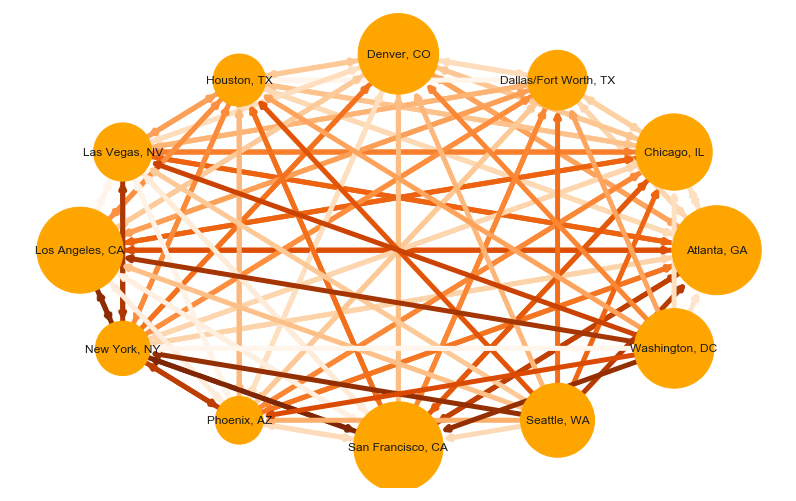

In [316]:
Grafo_distance=nx.from_pandas_edgelist(nodo_distance,'OriginCityName','DestCityName',create_using=nx.DiGraph())
nx.draw(Grafo_distance,with_labels=True, 
        node_color='Orange', 
        node_size=Base_nodo["Flights"]*10, 
        edge_color=nodo_distance["Distance"], 
        width=5, 
        edge_cmap=plt.cm.Oranges,
       pos=nx.circular_layout(Grafo))

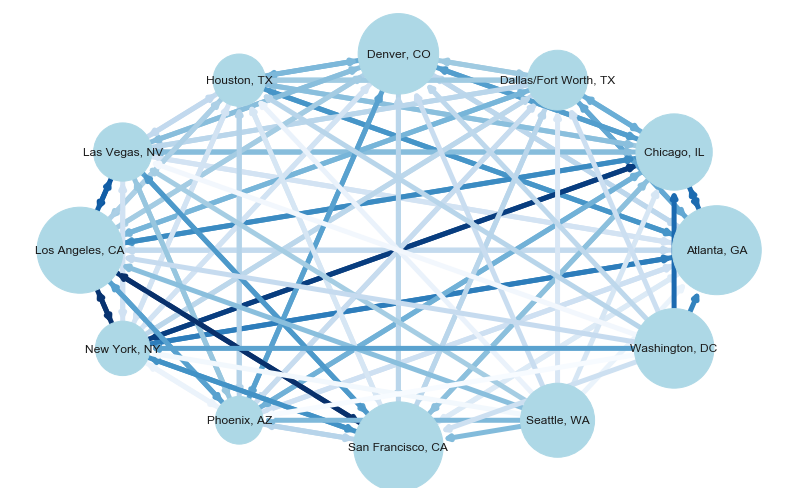

In [317]:
Grafo=nx.from_pandas_edgelist(Base_nodo,'OriginCityName','DestCityName',create_using=nx.DiGraph())
nx.draw(Grafo,with_labels=True, 
        node_color='lightblue', 
        node_size=Base_nodo["Flights"]*10, 
        edge_color=Base_nodo["Flights"], 
        width=5, 
        edge_cmap=plt.cm.Blues,
       pos=nx.circular_layout(Grafo))

### Observaciones

El área de cada nodo representa la cantidad de vuelos tanto de entrada como de salida en cada uno de las ciudades, las aristas al ser dirigidas indican sí el total de vuelos iba de salida o de llegada. De esta forma se puede observar que de las ciudades como San Francisco y Washington salen varios vuelos y a las ciudades como Atlanta llegan varios vuelos. También hay ciudades que se caracterizan por tener gran cantidad de vuelos tanto como de salida como de llegada, y estos son Chicago y Los Ángeles. 
Adicionalmente se puede ver que entre los trayectos o rutas más populares entre los viajeros se encuentra la ruta de New York <-> Los Ángeles siendo ciudades muy alejadas entre sí, también está la ruta de Los Ángeles <-> San Francisco y New York <-> Chicago, estas dos últimas como ciudades cercanas.

### Abstracción del ¿qué?, ¿por qué? y ¿cómo?

**What?**
Para efectos de la visualización se hace uso de un datase tipo red, donde los nodos son representados por las ciudades origen y destino de Estados Unidos para los vuelos que se presentaron durante el mes de febrero, siendo estos atributos de tipo categórico y las aristas representando la conexión de estos vuelos y su cantidad, siendo esta variable de tipo cuantitativo ordenado con dirección secuencial.

**Why?**
Uno de los objetivos de la visualización es explorar y localizar los caminos o rutas entre los vuelos de ciudad a ciudad. Adicionalmente se busca presentar y look-up los tipos de relaciones o conexiones entre dichos vuelos.

**How?**
Inicialmente se identificó las 10 ciudades top de destino, y se filtró por cada una de ellas, creando otra base de datos y posteriormente se creó otra teniendo en cuenta las primeras 12 ciudades con más vuelos de salida. Estos filtros de ciudades se realizaron con el fin de que no hubiera mucha cantidad de nodos y aristas y evitar presencia de oclusión. Luego se agrupó por ciudad de origen y destino la cantidad de vuelos total y con esta información se creó el grafo.
    
### Marcas y canales
     
+ La visualización hace uso de Marcas de puntos para nodos y marca de líneas para las aristas o enlaces.

Con respecto a los canales usados se destaca:
+ Canal de color en las aristas para representar la concentración de vuelos entre ciudades. Entre más oscuro más cantidad de vuelo entre nodos.
+ Canal de forma representado por las etiquetas del nombre de la ciudad en cada uno de los nodos.
+ Canal de área para los nodos, representando de esta forma la cantidad de vuelos tanto de salida como de llegada por ciudad.
+ Posición espacial: Se ajusta una posición espacial circular, cuyo orden es codificado directamente por la librería.
     
     
### Mejoras posibles
 
Una mejora posible podría ser la implementación de interactividad en la visualización, donde al pararse con el cursor en cada uno de los nodos se mostrará las ciudades de origen que llega a dicha ciudad destino y un conteo de estas, esto con el fin de mostrar a más detalle las conexiones entre ciudades. Con respecto a mejoras en los canales implementados, se podría cambiar el canal de color para que, en vez de representar la cantidad de vuelos, pudiera representar la distancia o tiempo de vuelo entre ciudades, siendo entre más oscuro el color más lejos o más tiempo de vuelos entre ciudades.


### Cantidad de vuelos promedio por hora del día

*Presentado por Kelly Sarmiento*

In [227]:
Cate

Cantidad_vuelos Hora del día
Tarde              153196        Tarde
Noche              136071        Noche
Mañana             107487       Mañana
Amanecer            10909     Amanecer

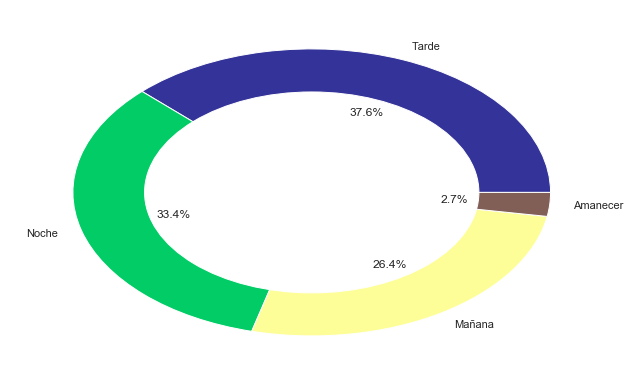

In [228]:
from matplotlib import cm
explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
n = len(Cate['Cantidad_vuelos'])
colors = [cm.terrain(i / n) for i in range(n)]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(Cate['Cantidad_vuelos'], labels=Cate['Hora del día'], colors = colors, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**OBSERVACIONES**

En este grafico podemos observar el porcentaje de vuelos en hora del día siendo 6AM a 12PM Mañana, de 12PM a 6PM tarde, de 6PM a 12AM noche y de las 00 a 6AM amanecer.

**¿QUÉ?**

El uso de una Tabla con 5 Atributos Categoricos "MAÑANA, TARDE, NOCHE Y AMANECER" y 5 Atributos Cuantitativos que son sus respectivos porcentajes.

**¿POR QUÉ?**

Presenta y compara

**¿CÓMO?**



**MARCAS Y CANALES**

Se uso la marca de Areá en este caso el circulo.
Se uso el canal de posición radial y tamaño para el porcentaje de cada variable y tambien el canal de color para las identificar cada variable cuantitativa.

**MEJORAS POSIBLES**

Una de las mejoras que le realizaria a esta visualizar es una posible interación en el grafico, donde al pararse sobre cada varible con el curso pueda mostrar en este caso la cantidad de vuelos que hay en cada hora del día.

### Grafico de barras radiales para el acumulado de retrasos según causa
*Presentado por: Daniel Arturo Acosta Gaitan*

In [229]:
Base_causa=Base_Alter[["DestCityName","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].melt(id_vars=["DestCityName"],var_name="Causa")
Base_causa.head(3)

DestCityName         Causa  value
0  Anchorage, AK  CarrierDelay    0.0
1    Seattle, WA  CarrierDelay    0.0
2   Portland, OR  CarrierDelay    0.0

In [230]:
Causa=Base_causa.groupby('Causa',as_index=False)['value'].sum().sort_values("value",ascending=False)

In [231]:
Causa['%'] = ((Causa['value'] / Causa['value'].sum())*100)
Causa

Causa      value          %
1  LateAircraftDelay  2157918.0  38.290857
0       CarrierDelay  1712660.0  30.390042
2           NASDelay  1349173.0  23.940201
4       WeatherDelay   411265.0   7.297631
3      SecurityDelay     4580.0   0.081269

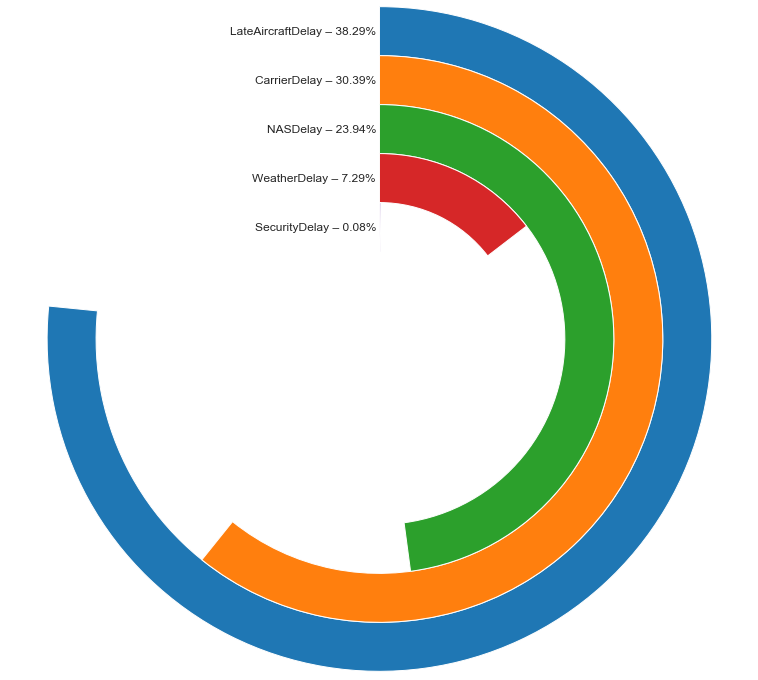

In [242]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

causas = ["LateAircraftDelay", "CarrierDelay", "NASDelay", "WeatherDelay", "SecurityDelay"]
porcentaje = [38.29, 30.39, 23.94, 7.29, 0.08]


n = len(porcentaje)
porcentaje_circulo = max(porcentaje) / 50

r = 1.9  
r_inner = 0.5  

w = (r - r_inner) / n

colors = plt.cm.tab10.colors


fig, ax = plt.subplots()
ax.axis("equal")

for i in range(n):
    radius = r - i * w
    ax.pie([porcentaje[i] / max(porcentaje) * porcentaje_circulo], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{causas[i]} – {porcentaje[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{causas[i]} – {porcentaje[i]}% ', ha='right', va='center')


plt.tight_layout()
plt.show()

### Abstracción del ¿qué?, ¿por qué? y ¿cómo?

**What?**
Esta visualización es una modificacipon del tradicional grafico de barras, el cual esta plasmando la participación de cinco variables relacionadas y de tipo cuantitativo, contra una variable derivada que sirve para totalizar el valor total dentro de cada una de estas variables. El dataset auxiliar incluye un resumen de las 5 variables cuantitativas, su total respectivo y porcentaje.


**Why?**
Las acciones que permite realizar esta visualización encontramos la de presentar, al buscar se puede realizar un locate. Entre los targets se puede resaltar el de poder comparar de manera cualitativa las cinco variables cuantitativas.
 

**How?**
Las tareas que se cumplieron al realizar esta visualización fueron la de ordenar mediante un filtrado del dataset general de mayor a menor las caracteristicas cualitativas, esto para lograr que la visualización fuera mas legible. 

    
### Marcas y canales
+ Esta visualización hace uso de los canales de posición radial y tamaño para reflejar el valor relativo de cada variable.
+ El canal de color se utiliza para diferenciar las distintas variables cualitativas

+ Las marcas de areas (en este caso circulos concentricos) sirven para clasificar a las variables cuantitativas.

     
### Mejoras posibles
+ Esta visualiación presenta el problema de que para la variable "SecurityDelay" debido a su pequeño valor, aparece de forma casi despreciable, quiza linealizando la variable "value"  de la tabla auxiliar con ayuda de un logaritmo ayudaria a esta variable ser más visible.


# Visualizaciones espaciales

### Cantidad de vuelos acumulados por día

*Presentado por Karen Rojas*

**Consolidación de información con base geográfica**

Fuente de información geográfica: https://simplemaps.com/data/us-cities

In [243]:
Base_geo=pd.read_csv("uscities.csv")
Base_geo.columns

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [244]:
Base_geo_util=Base_geo[["state_name","city","lat","lng","population"]]
Base_geo_util.head()

state_name         city      lat       lng  population
0    New York     New York  40.6943  -73.9249    18713220
1  California  Los Angeles  34.1139 -118.4068    12750807
2    Illinois      Chicago  41.8373  -87.6862     8604203
3     Florida        Miami  25.7839  -80.2102     6445545
4       Texas       Dallas  32.7936  -96.7662     5743938

**Modificación nombre de ciudades destino para merge con información geográfica**

In [245]:
Base_Alter[["DestStateName","DestCityName"]].head(4)

DestStateName   DestCityName
0        Alaska  Anchorage, AK
1    Washington    Seattle, WA
2        Oregon   Portland, OR
3        Alaska  Anchorage, AK

In [246]:
fun= lambda x: x.split(",",1)[0]
good_cities=Base_Alter["DestCityName"].apply(fun)
good_cities.head(3)

0    Anchorage
1      Seattle
2     Portland
Name: DestCityName, dtype: object

In [247]:
good_cities[good_cities=="Bristol/Johnson City/Kingsport"].head(3)

1916    Bristol/Johnson City/Kingsport
3944    Bristol/Johnson City/Kingsport
5292    Bristol/Johnson City/Kingsport
Name: DestCityName, dtype: object

In [248]:
fun2= lambda x: x.split("/",1)[0]
good_cities_def=good_cities.apply(fun2)

In [249]:
good_cities_def[good_cities_def=="Bristol/Johnson City/Kingsport"]

Series([], Name: DestCityName, dtype: object)

In [250]:
good_cities_def[good_cities_def=="Bristol"].head(3)

1916    Bristol
3944    Bristol
5292    Bristol
Name: DestCityName, dtype: object

In [251]:
good_cities_def[good_cities_def=="Adak Island"]="Adak"
good_cities_def[good_cities_def=="Barrow"]="Utqiagvik"
good_cities_def[good_cities_def=="Islip"]="Islip Terrace"
good_cities_def[good_cities_def=="Kona"]="Kailua"

In [252]:
Base_Alter["Nombre_ciudad_dest"]=good_cities_def

In [253]:
baba=pd.pivot_table(data=Base_Alter,values="Flights",index=["DestStateName","Nombre_ciudad_dest"],
               columns="DayofMonth",aggfunc="sum",fill_value=0).reset_index()
baba.head()

DayofMonth DestStateName Nombre_ciudad_dest   1   2   3   4   5   6   7   8  \
0                Alabama         Birmingham  28  35  36  40  40  39  27  36   
1                Alabama             Dothan   3   4   4   4   4   4   3   4   
2                Alabama         Huntsville  10  13  14  12  14  15   8  14   
3                Alabama             Mobile   9  16  14  15  16  16   9  14   
4                Alabama         Montgomery   5  10  10  10  10  10   7   9   

DayofMonth   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  \
0           39  38  38  41  41  23  34  41  41  41  42  42  23  38  36  39   
1            4   4   4   4   4   3   3   4   4   4   4   1   1   4   4   4   
2           15  14  14  16  15   7  10  12  14  15  14  14   8  12  14  12   
3           16  15  15  16  16  11  13  16  16  16  16  16  11  13  12  12   
4           10  10  10  10  10   5   7  10  10  10  10  10   7   6   7   9   

DayofMonth  25  26  27  28  
0           33  40  40  23  
1            3   3   4   3  
2            8  13  14   8  
3           14  16  15  10  
4            8   9   9   5

In [258]:
def Acum(x):
    for i in range(2,29):
        x[i]=x[i]+x[i-1]
    return x

In [259]:
v=[]
for i in range(0,baba.shape[0]):
    ress=Acum(baba.iloc[i,2:30])
    v.append(ress)

In [260]:
res_acum_dias=pd.DataFrame(v)
res_acum_dias["Estado_destino"]=baba["DestStateName"]
res_acum_dias["Ciudad_destino"]=baba["Nombre_ciudad_dest"]
res_acum_dias.head()

DayofMonth   1   2   3    4    5    6    7    8    9   10   11   12   13   14  \
0           28  63  99  139  179  218  245  281  320  358  396  437  478  501   
1            3   7  11   15   19   23   26   30   34   38   42   46   50   53   
2           10  23  37   49   63   78   86  100  115  129  143  159  174  181   
3            9  25  39   54   70   86   95  109  125  140  155  171  187  198   
4            5  15  25   35   45   55   62   71   81   91  101  111  121  126   

DayofMonth   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0           535  576  617  658  700  742  765  803  839  878  911  951  991   
1            56   60   64   68   72   73   74   78   82   86   89   92   96   
2           191  203  217  232  246  260  268  280  294  306  314  327  341   
3           211  227  243  259  275  291  302  315  327  339  353  369  384   
4           133  143  153  163  173  183  190  196  203  212  220  229  238   

DayofMonth    28 Estado_destino Ciudad_destino  
0           1014        Alabama     Birmingham  
1             99        Alabama         Dothan  
2            349        Alabama     Huntsville  
3            394        Alabama         Mobile  
4            243        Alabama     Montgomery

In [261]:
Base_def_vuelos_acum=res_acum_dias.melt(id_vars=["Estado_destino","Ciudad_destino"],value_name="Vuelos")
Base_def_vuelos_acum.columns=["Estado_destino","Ciudad_destino","Día_mes","Vuelos"]
Base_def_vuelos_acum.head()

Estado_destino Ciudad_destino Día_mes  Vuelos
0        Alabama     Birmingham       1      28
1        Alabama         Dothan       1       3
2        Alabama     Huntsville       1      10
3        Alabama         Mobile       1       9
4        Alabama     Montgomery       1       5

In [262]:
Base_unida=pd.merge(Base_def_vuelos_acum,Base_geo_util,left_on=["Estado_destino","Ciudad_destino"],right_on=["state_name","city"],how="inner")
Base_unida.head()

Estado_destino Ciudad_destino Día_mes  Vuelos state_name        city  \
0        Alabama     Birmingham       1      28    Alabama  Birmingham   
1        Alabama     Birmingham       2      63    Alabama  Birmingham   
2        Alabama     Birmingham       3      99    Alabama  Birmingham   
3        Alabama     Birmingham       4     139    Alabama  Birmingham   
4        Alabama     Birmingham       5     179    Alabama  Birmingham   

       lat      lng  population  
0  33.5277 -86.7987      739573  
1  33.5277 -86.7987      739573  
2  33.5277 -86.7987      739573  
3  33.5277 -86.7987      739573  
4  33.5277 -86.7987      739573

In [263]:
Base_unida.shape

(8484, 9)

In [264]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1Ijoia2FyZW5yb2phcyIsImEiOiJja25tMmw3OWQwbXl6MnBvNTdjam5xdW9jIn0.GkuAPjGFBNUEvZcZ8_-uTw")

fig = px.scatter_mapbox(Base_unida, 
                        lat="lat", 
                        lon="lng",
                        hover_name="Ciudad_destino",     
                        color="Vuelos", 
                        size="Vuelos",
                        animation_frame='Día_mes',
                        color_continuous_scale=px.colors.sequential.Oranges,
                        zoom=3)
fig.show()


### Observaciones

Se puede observar que los vuelos diarios acumulados del mes de febrero del 2015 hacia algunas ciudades de Estados Unidos crecen a mayor ritmo que otras del mismo país. Entre estas destacan Atlanta, Chicago y Dallas.

### Abstracción del ¿qué?, ¿por qué? y ¿cómo?

**What?** La visualización hace uso de una dataset con información de geometría geográfica, con posiciones dadas por la latitud y longitud de cada una de las ciudades de Estados Unidos que presentaron vuelos entrantes en el mes de febrero del 2015. Adicionalmente se usa un atributo de tipo cuantitativo ordenado con dirección secuencial que viene representado por la cantidad de vuelos acumulados por día del mes.

**Why?** El fin de la visualización es localizar las coordenadas geográficas de las ciudades de Estados Unidos y la información contenida buscando, de forma adicional, presentar e identificar la cantidad de vuelos acumulados que entraron a las diferentes ciudades de Estados Unidos durante el mes de febrero del año 2015.


**How?** Inicialmente se lleva los nombres de las ciudades de la base que contiene la información de la cantidad de los vuelos al mismo formato en que se encuentran en la base que contienen la información de coordenadas geográficas. Luego se calcula la cantidad de vuelos acumulados por Estado, Ciudad y por supuesto por día del mes. Y con esta tabla se realiza la unión de las dos bases generando la tabla necesaria para la realización de la visualización


### Marcas y canales
     
+ La visualización hace uso de marcas de puntos para representar las coordenadas geográficas de las ciudades de Estados Unidos.

Con respecto a los canales usados se destaca:

+ Tanto el canal de color como de tamaño vienen representados por la cantidad de vuelos acumulados que ingresan a la ciudad durante el mes de febrero de 2015, donde en el primer canal entre más oscuro más vuelos que entran y con respecto al segundo canal, entre más grande el área de la burbuja, más vuelos también.
     
     
### Mejoras posibles
 
Una de las mejoras posibles podría ser la presentación de únicamente el mapa de Estados Unidos en la visualización sin la necesidad de mostrar el resto de países de los diferentes continentes o subrayar este mapa, lo anterior con el fin de hacer énfasis en el país o región que se quiere mostrar. Otra mejora posible podría ser la presentación de la cantidad de vuelos de la misma forma, pero esta vez teniendo en cuenta el área de la ciudad destino y así, ciudades con pocos vuelos de llegada y áreas relativamente grandes serían más penalizados que las de pocos vuelos, pero áreas pequeñas.


### Distancia en minutos por ciudades

*Presentado por Kelly Sarmiento*

In [273]:
Base_inf_distancia=Base_Alter.groupby(["DestStateName","Nombre_ciudad_dest"],as_index=False)["Distance"].mean()

In [274]:
Base_unida_dist=pd.merge(Base_inf_distancia,Base_geo_util,left_on=["DestStateName","Nombre_ciudad_dest"],right_on=["state_name","city"],how="inner")
Base_unida_dist.head()

DestStateName Nombre_ciudad_dest    Distance state_name        city  \
0       Alabama         Birmingham  527.332347    Alabama  Birmingham   
1       Alabama             Dothan  170.000000    Alabama      Dothan   
2       Alabama         Huntsville  393.037249    Alabama  Huntsville   
3       Alabama             Mobile  413.746193    Alabama      Mobile   
4       Alabama         Montgomery  281.876543    Alabama  Montgomery   

       lat      lng  population  
0  33.5277 -86.7987      739573  
1  31.2335 -85.4069       72396  
2  34.6988 -86.6412      319249  
3  30.6783 -88.1162      315502  
4  32.3473 -86.2666      254634

In [275]:
import plotly.graph_objects as go

import pandas as pd

df = Base_unida_dist
df['text'] = df['city'] + ', ' + df['state_name'] +  df['Distance'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['lng'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker_color  =  df [ 'Distance' ], 
        ))

fig.update_layout(
        title = 'Distancia',
        geo_scope='usa',
    )
fig.show()

**OBSERVACIONES**



**¿QUÉ?**



**¿POR QUÉ?**



**¿CÓMO?**



**MARCAS Y CANALES**


**MEJORAS POSIBLES**



### Mapa de burbujas sobre el top 10 de las ciudades con mayores retrasos en vuelos
*Presentado por: Daniel Arturo Acosta Gaitan*

In [276]:
Base_causaEstado=Base_Alter[["OriginCityName","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].melt(id_vars=["OriginCityName"],var_name="Causa")
Base_causaEstado.head(5)

OriginCityName         Causa  value
0     Portland, OR  CarrierDelay    0.0
1    Fairbanks, AK  CarrierDelay    0.0
2    Anchorage, AK  CarrierDelay    0.0
3     Portland, OR  CarrierDelay    0.0
4  Los Angeles, CA  CarrierDelay    0.0

In [277]:
Top10ciudadesCAUSA=pd.DataFrame(Base_Alter["OriginCityName"].value_counts(normalize=False)).sort_values(by='OriginCityName',ascending=False).head(10)

In [278]:
Top10ciudadesCAUSA["Lat"]=[33.7490987,41.8755546,32.7761963,29.7589382,34.053717,39.7391536,40.7305991,33.4467681,37.7792768,36.1662859]
Top10ciudadesCAUSA["Lon"]=[-84.3901849,-87.6244212,-96.7968994,-95.3676974,-118.2427266,-104.9847034,-73.9865812,-112.0756724,-122.4192704,-115.149225]
Top10ciudadesCAUSA["City"]=['Atlanta','Chicago','Dallas/Fort Worth','Houston','Los Angeles','Denver','New York','Phoenix','San Francisco','Las Vegas']
Top10ciudadesCAUSA.rename(columns={'OriginCityName': 'Retrasos_Acumulados'}, inplace=True)
Top10ciudadesCAUSA

Retrasos_Acumulados        Lat         Lon  \
Atlanta, GA                          26359  33.749099  -84.390185   
Chicago, IL                          25634  41.875555  -87.624421   
Dallas/Fort Worth, TX                18779  32.776196  -96.796899   
Houston, TX                          16009  29.758938  -95.367697   
Los Angeles, CA                      15394  34.053717 -118.242727   
Denver, CO                           15205  39.739154 -104.984703   
New York, NY                         15104  40.730599  -73.986581   
Phoenix, AZ                          11728  33.446768 -112.075672   
San Francisco, CA                    11185  37.779277 -122.419270   
Las Vegas, NV                        10388  36.166286 -115.149225   

                                    City  
Atlanta, GA                      Atlanta  
Chicago, IL                      Chicago  
Dallas/Fort Worth, TX  Dallas/Fort Worth  
Houston, TX                      Houston  
Los Angeles, CA              Los Angeles  
Denver, CO                        Denver  
New York, NY                    New York  
Phoenix, AZ                      Phoenix  
San Francisco, CA          San Francisco  
Las Vegas, NV                  Las Vegas

Text(0.5,0,'Ciudad')

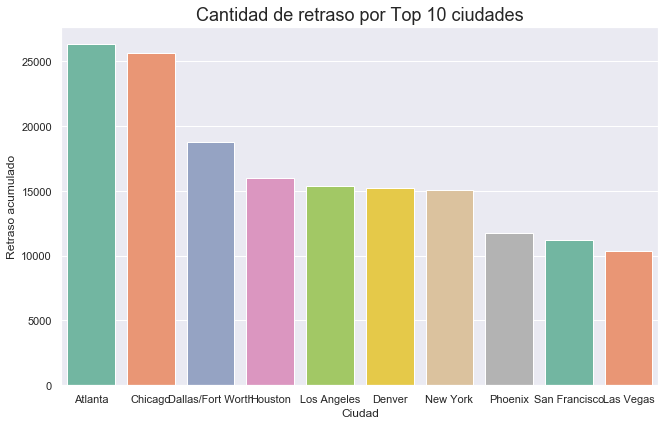

In [320]:
sns.barplot(x="City",y="Retrasos_Acumulados",data=Top10ciudadesCAUSA,palette="Set2",ci=None)
plt.title("Cantidad de retraso por Top 10 ciudades",size=18)
plt.ylabel("Retraso acumulado")
plt.xlabel("Ciudad")

In [318]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1IjoiYWNvZGFuMTk4NiIsImEiOiJja25tMjZnc2MwbW9xMnZuMWgwZ242cHR0In0.eGfoIyyGlH87fEd_zQ8P-Q")

fig = px.scatter_mapbox(Top10ciudadesCAUSA, 
                        lat="Lat", 
                        lon="Lon",
                        hover_name="City",     
                        color="Retrasos_Acumulados", 
                        size="Retrasos_Acumulados",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        zoom=3)
fig.show()

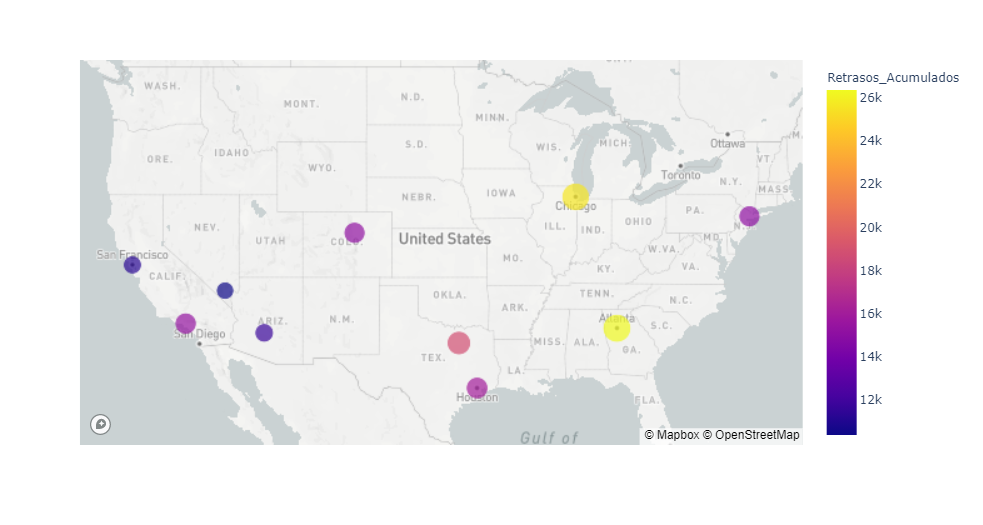

### Abstracción del ¿qué?, ¿por qué? y ¿cómo?

**What?**
Esta visualización hace uso de geometrias y posiciones para plasmar en un mapa el top 10 de las ciudades que presentaron el mayor numero de ocurrencia de retrasos de vuelos en sus aeropuertos. En el gráfico esta compuesto por una variable cuantitativa (acumulado de retrasos) y la posición de las 10 ciudades en cuestión.


**Why?**
Las acciones que permite realizar esta visualización son la de presentar información, al buscar se puede explorar localizaciones. Entre los targets esta el de hacer un shape con las ubicaciones mediante datos espaciales.
 
**How?**
Se hace uso de la codificación de color con el fin de dar interpretación a la variable cuantitativa, para poder hacer uso del mapa fue necesario agregar manualmente las coordenadas, tambien la generación de una tabla auxiliar con el fin de realizar el consolidado de la variable cuantitativa (Minutos de retraso acumulados por ciudad)

    
### Marcas y canales
+ El canal de posición no se utiliza en esta visualización para codificar atributos sobre las variables.
+ Se utilizan marcas de puntos para codificar las ciudades y estos a su vez utilizan el canal del tamaño para reflejar el valor de la variable cualitativa.
+ Estas marcas de puntos tambien hacen uso de un canal de color para asentuar el valor de la variable cualitativa.

     
### Mejoras posibles
+ Personalmente esta visualización me parece que cumple su propósito pero presenta limitaciones al permitir mostrar únicamente una variable cuantitativa. Una posible solución seria añadir mas información en los labels o una capa de interactividad para cambiar entre visualizaciones con diferentes variables cuantitativas.